In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
def draw_cartesian_2d(xlims=[-2, 2], ylims=[-2, 2]):
    plt.figure(figsize=(10,10), dpi=80)
    # Create a new subplot from a grid of 1x1
    plt.subplot(111)
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    plt.xlim(xlims[0], xlims[1])
    plt.ylim(ylims[0], ylims[1])
    plt.grid(True)

In [3]:
def draw_cartesian_3d(xlims=[-2, 2], ylims=[-2, 2], zlims=[-2, 2], draw_axis=True):
    fig = plt.figure(figsize=(6,6), dpi=80)
    fig.add_subplot(111, projection='3d')
    ax = plt.gca()
    ax.set_xlim(xlims[0], xlims[1])
    ax.set_ylim(ylims[0], ylims[1])
    ax.set_zlim(zlims[0], zlims[1])
    ax.scatter([0], [0], [0])
    if draw_axis:
        ax.plot([0, 0], [0, 0], [zlims[0], zlims[1]])
        ax.plot([0, 0], [ylims[0], ylims[1]], [0, 0])
        ax.plot([xlims[0], xlims[1]], [0, 0], [0, 0])
    plt.grid(False)

In [4]:
def draw_vector_2d(to, fr=[0,0], label=None, color='black'):
    soa =np.array([[fr[0],fr[1],to[0],to[1]]]) 
    X,Y,U,V = zip(*soa)
    ax = plt.gca()
    ax.quiver(X,Y,U,V, angles='xy', scale_units='xy', scale=1, width=0.0035, color=color)
    if label is not None:
        plt.text(to[0], to[1] + 0.05, label, fontsize=13, color=color, fontweight='bold')

In [5]:
def draw_vector_3d(to, fr=np.array([0,0,0]), label=None, color='black', draw_tips=False):
    ax = plt.gca()
    vec_length = np.linalg.norm(to - fr)
    print(vec_length)
    print([fr[0]], [fr[1]], [fr[2]], [to[0]], [to[1]], [to[2]])
    ax.quiver([fr[0]], [fr[1]], [fr[2]], [to[0]], [to[1]], [to[2]], 
              pivot='tail', 
              length=vec_length, 
              color=color,
              arrow_length_ratio=0.16,
              linewidth=2)
    
    if draw_tips:
        ax.plot([to[0], to[0]], [to[1], to[1]], [to[2], 0], '--', color=color)
        ax.plot([0, to[0]], [to[1], to[1]], [0, 0], '--', color=color)
        ax.plot([to[0], to[0]], [0, to[1]], [0, 0], '--', color=color)
    
    if label is not None:
        ax.text(to[0], to[1] + 0.05, to[2] + 0.05,s=label, fontsize=13, color=color, fontweight='bold')

In [6]:
doc1 = np.array([1, 0, 1])
doc2 = np.array([1, 1, 0])

In [7]:
C = np.array([doc1, doc2]).T # vector document matrix
print(C)

[[1 1]
 [0 1]
 [1 0]]


In [8]:
CT = C.T
print(CT)

[[1 0 1]
 [1 1 0]]


In [9]:
C.dot(C.T)

array([[2, 1, 1],
       [1, 1, 0],
       [1, 0, 1]])

In [10]:
d1 = CT[0]
d2 = CT[1]
print(d1, d2)

w1 = C[0]
w2 = C[1]
w3 = C[2]
print(w1, w2, w3)

[1 0 1] [1 1 0]
[1 1] [0 1] [1 0]


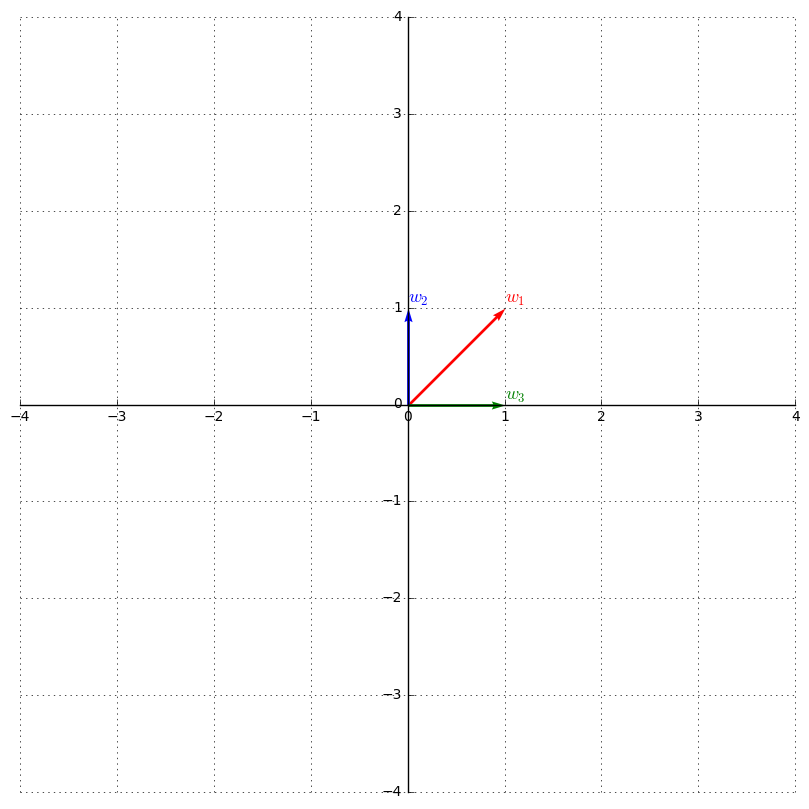

In [11]:
draw_cartesian_2d(xlims=[-4, 4], ylims=[-4, 4])
draw_vector_2d(to=w1, color='red', label=r'$w_1$')
draw_vector_2d(to=w2, color='blue', label=r'$w_2$')
draw_vector_2d(to=w3, color='green', label=r'$w_3$')
plt.show()

In [12]:
td1 = CT.dot(d1)
td2 = CT.dot(d2)
print(td1, td2)

[2 1] [1 2]


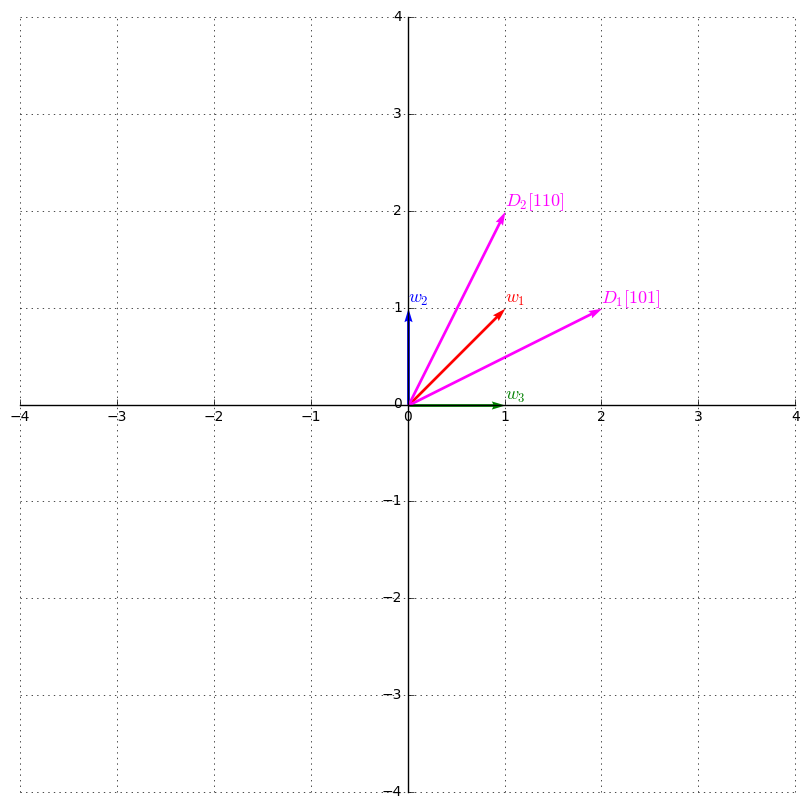

In [13]:
draw_cartesian_2d(xlims=[-4, 4], ylims=[-4, 4])
draw_vector_2d(to=w1, color='red', label=r'$w_1$')
draw_vector_2d(to=w2, color='blue', label=r'$w_2$')
draw_vector_2d(to=w3, color='green', label=r'$w_3$')
draw_vector_2d(to=td1, color='magenta', label=r'$D_1{}$'.format(d1))
draw_vector_2d(to=td2, color='magenta', label=r'$D_2{}$'.format(d2))
plt.show()

In [14]:
ttd1 = C.dot(td1)
ttd2 = C.dot(td2)
print(ttd1, ttd2)

[3 1 2] [3 2 1]


In [15]:
C.dot(CT.dot(np.array([1, 1, 1])))

array([4, 2, 2])

In [16]:
C.dot(CT.dot(np.array([1, 0, 0])))

array([2, 1, 1])

1.41421356237
[0] [0] [0] [1] [0] [1]
1.41421356237
[0] [0] [0] [1] [1] [0]
3.74165738677
[0] [0] [0] [3] [1] [2]
3.74165738677
[0] [0] [0] [3] [2] [1]


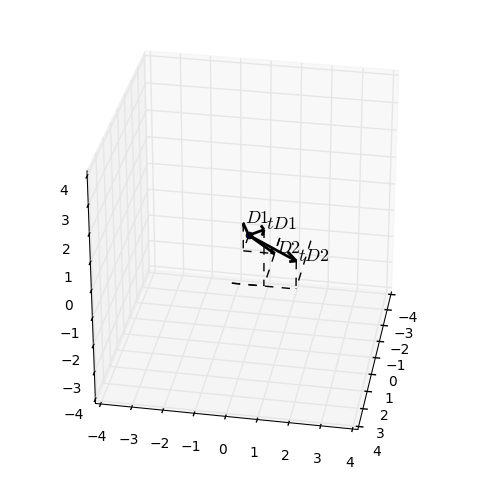

In [17]:
draw_cartesian_3d(xlims=[-4, 4], ylims=[-4, 4], zlims=[-4, 4], draw_axis=False)
draw_vector_3d(to=d1, draw_tips=True, label=r'$D1$', color='black')
draw_vector_3d(to=d2, draw_tips=True, label=r'$D2$', color='black')

draw_vector_3d(to=ttd1, draw_tips=True, label=r'$tD1$', color='black')
draw_vector_3d(to=ttd2, draw_tips=True, label=r'$tD2$')
ax = plt.gca()
ax.view_init(30, 10)
plt.show()

In [18]:
C.dot(CT)

array([[2, 1, 1],
       [1, 1, 0],
       [1, 0, 1]])

In [19]:
U = np.array([[-0.816, 0], [-0.408, -0.707], [-0.408, 0.707]])
U

array([[-0.816,  0.   ],
       [-0.408, -0.707],
       [-0.408,  0.707]])

In [20]:
E = np.array([[1.732, 0], [0, 1]])
E

array([[ 1.732,  0.   ],
       [ 0.   ,  1.   ]])

In [21]:
VT = np.array([[-0.707, -0.707], [0.707, -0.707]])
VT

array([[-0.707, -0.707],
       [ 0.707, -0.707]])

In [22]:
print((U.dot(E)).dot(VT))

[[  9.99211584e-01   9.99211584e-01]
 [ -2.43208000e-04   9.99454792e-01]
 [  9.99454792e-01  -2.43208000e-04]]


In [23]:
print(C)

[[1 1]
 [0 1]
 [1 0]]


In [24]:
print(CT)

[[1 0 1]
 [1 1 0]]


In [25]:
C.dot(CT)

array([[2, 1, 1],
       [1, 1, 0],
       [1, 0, 1]])

In [26]:
CT.dot(C)

array([[2, 1],
       [1, 2]])

In [27]:
U.T.dot(U)

array([[ 0.998784,  0.      ],
       [ 0.      ,  0.999698]])

In [28]:
np.linalg.svd(C)

(array([[ -8.16496581e-01,  -1.66533454e-16,  -5.77350269e-01],
        [ -4.08248290e-01,  -7.07106781e-01,   5.77350269e-01],
        [ -4.08248290e-01,   7.07106781e-01,   5.77350269e-01]]),
 array([ 1.73205081,  1.        ]),
 array([[-0.70710678, -0.70710678],
        [ 0.70710678, -0.70710678]]))

In [29]:
U1 = np.array([[-0.816, 0, -0.577], [-0.408, -0.707, 0.577], [-0.408, 0.707, 0.577]])

In [30]:
U1

array([[-0.816,  0.   , -0.577],
       [-0.408, -0.707,  0.577],
       [-0.408,  0.707,  0.577]])

In [31]:
U1.T.dot(U1)

array([[ 0.998784,  0.      ,  0.      ],
       [ 0.      ,  0.999698,  0.      ],
       [ 0.      ,  0.      ,  0.998787]])

In [32]:
np.linalg.eig(C.dot(CT))

(array([  3.00000000e+00,  -2.91433544e-16,   1.00000000e+00]),
 array([[ -8.16496581e-01,  -5.77350269e-01,  -1.57009246e-16],
        [ -4.08248290e-01,   5.77350269e-01,  -7.07106781e-01],
        [ -4.08248290e-01,   5.77350269e-01,   7.07106781e-01]]))

In [33]:
np.linalg.eig(CT.dot(C))

(array([ 3.,  1.]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [34]:
U1 = np.array([[2/np.sqrt(6), 1/np.sqrt(6), 1/np.sqrt(6)], [0, -1/np.sqrt(2), 1/np.sqrt(2)], [-1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3)]]).T
print(U1.dot(U1.T))
print(U1.T.dot(U1))

[[  1.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   2.77555756e-16]
 [  0.00000000e+00   2.77555756e-16   1.00000000e+00]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [35]:
E

array([[ 1.732,  0.   ],
       [ 0.   ,  1.   ]])

In [36]:
VT1 = np.array([[-1, -1], [1, -1]])

In [37]:
U1.dot(E).dot(VT1)

ValueError: shapes (3,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

# Dirichlet distribution

In [194]:
K = 50 # number of topics

In [300]:
def plot_dir(alphas):
    probs = np.random.dirichlet(alphas)
    fig = plt.figure(figsize=(10,3))
    ax = fig.add_subplot(111)
    ax.bar(range(len(alphas)), probs)
    plt.ylabel("Topic probability")
    plt.xlabel("Topic index")
    plt.show()

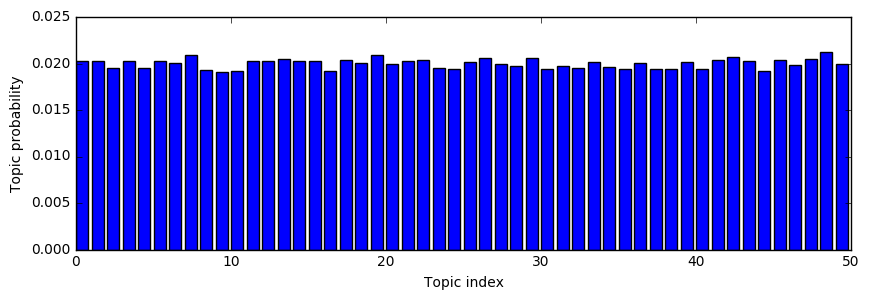

In [302]:
plot_dir([1000]*K)

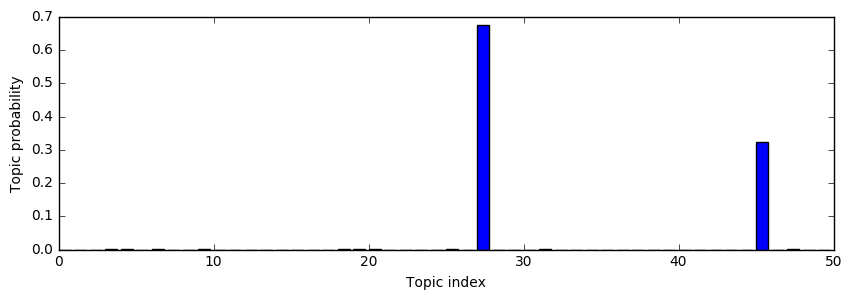

In [303]:
plot_dir([0.007]*K)

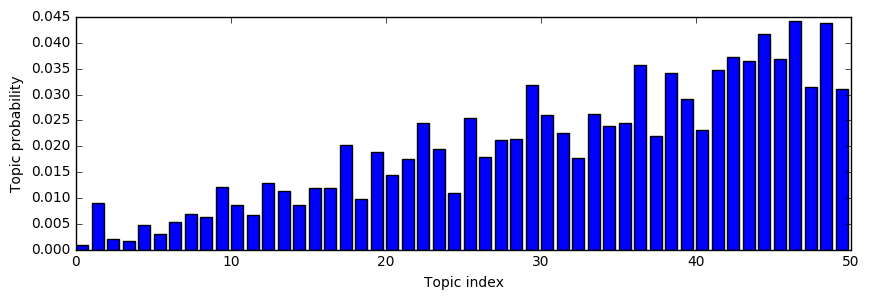

In [304]:
plot_dir(np.array(range(1, K+1)))

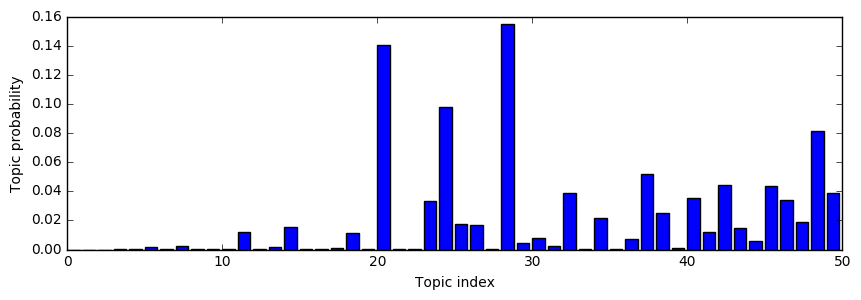

In [323]:
plot_dir(np.array(range(1, K+1)) / 100)

In [306]:
np.var(np.random.dirichlet([0.01]*2, size=1000), axis=0)

array([ 0.24428904,  0.24428904])

In [307]:
np.mean(np.random.dirichlet([10000]*50, size=1000), axis=0)

array([ 0.02001091,  0.02000665,  0.02000751,  0.01998876,  0.01999811,
        0.01998624,  0.0199979 ,  0.02000974,  0.01999988,  0.01999711,
        0.02000357,  0.02000047,  0.02000532,  0.02000578,  0.02000113,
        0.01999406,  0.02000763,  0.01999911,  0.02000596,  0.02000319,
        0.01999662,  0.01999709,  0.01999479,  0.0200003 ,  0.02000635,
        0.02000504,  0.01999964,  0.0200018 ,  0.01998619,  0.0200029 ,
        0.02000665,  0.01999332,  0.02000908,  0.02000662,  0.02000875,
        0.02000641,  0.01999532,  0.01999626,  0.01999355,  0.01999539,
        0.01999316,  0.01999301,  0.02000002,  0.01999944,  0.01999804,
        0.02000096,  0.02000068,  0.019997  ,  0.01999418,  0.01999245])

In [308]:
np.random.dirichlet([0.01]*2, size=1)

array([[  1.00000000e+000,   6.15626134e-142]])

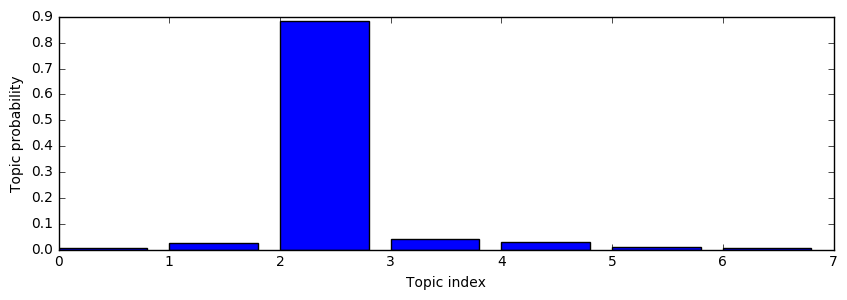

In [337]:
plot_dir([1, 2, 100, 4, 3, 2, 1])

In [394]:
np.mean(np.random.uniform(5, 100, size=100000)-52.5)

-0.022200592572974725

In [372]:
np.sqrt(((100-5)**2)/12)

27.424137786507224

In [388]:
(100+5)/2

52.5